<a href="https://colab.research.google.com/github/Panperception/Face2Brain/blob/main/Face2Brain_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load PD DBS Face Data

In [4]:
# !pip install tensorflow
import keras
import matplotlib.pyplot as plt

import numpy as np
import scipy.io

# from google.colab import drive
# drive.mount('/content/gdrive')
# ##!cp '/content/gdrive/My Drive/FacePD/PD_DBS_Data.mat' PD_DBS_Data.mat

import gdown

url = 'https://drive.google.com/file/d/1Yz9I435rIvz3ww2eLRI7kMTBiwthpaRk/view?usp=sharing'
save_file = 'PD_DBS_Data.mat'
gdown.download(url, save_file, quiet=False,fuzzy=True)

mat = scipy.io.loadmat(save_file)
x_train = mat['x_train']
x_test = mat['x_test']
y_train = mat['y_train']
y_test = mat['y_test']



Downloading...
From (original): https://drive.google.com/uc?id=1Yz9I435rIvz3ww2eLRI7kMTBiwthpaRk
From (redirected): https://drive.google.com/uc?id=1Yz9I435rIvz3ww2eLRI7kMTBiwthpaRk&confirm=t&uuid=52490a08-ec66-400e-a697-2ce94b7c353d
To: /content/PD_DBS_Data.mat
100%|██████████| 19.2M/19.2M [00:00<00:00, 46.6MB/s]


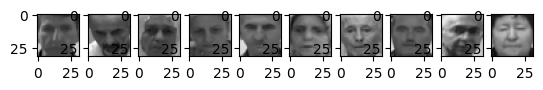

In [5]:
for k in range(10):
  tmp=x_test[k*100,].reshape((32,32))
  plt.subplot(1,10,k+1)
  plt.imshow(np.tile(tmp,[3,1,1]).T)


## DNN Classifiers

Epoch 1/350
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5726 - loss: 0.7140 - val_accuracy: 0.8136 - val_loss: 0.5719
Epoch 2/350
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6265 - loss: 0.6708 - val_accuracy: 0.5085 - val_loss: 0.6690
Epoch 3/350
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6457 - loss: 0.6182 - val_accuracy: 0.7966 - val_loss: 0.5342
Epoch 4/350
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6991 - loss: 0.5763 - val_accuracy: 0.4915 - val_loss: 0.7183
Epoch 5/350
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7323 - loss: 0.5327 - val_accuracy: 0.7119 - val_loss: 0.5579
Epoch 6/350
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7371 - loss: 0.5180 - val_accuracy: 0.6271 - val_loss: 0.6907
Epoch 7/350
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7750 - loss: 0.4599 - val_accuracy: 0.4576 - val_loss: 1.1464
Epoch 8/350
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7496 - loss: 0.4897 - val_accuracy: 0.61

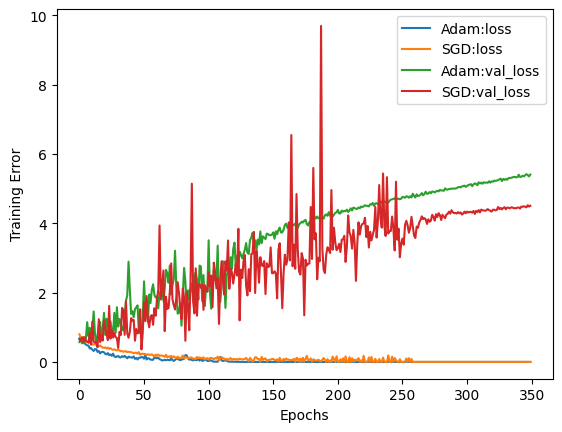

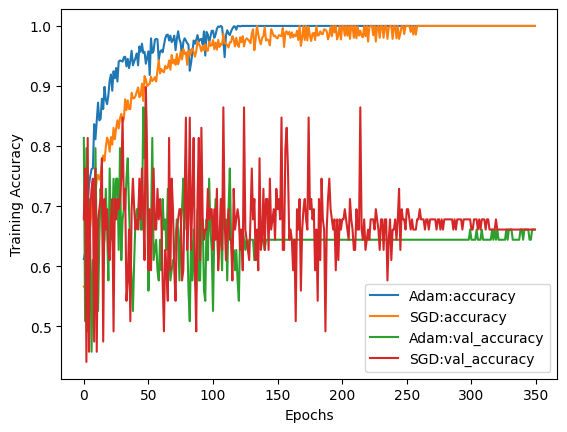

In [ ]:
# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(y_train, num_classes=2)

inputsize = 1024

# define a 4 hidden layer DNN
model_dmlp_adam = keras.Sequential()
model_dmlp_adam.add(keras.Input(shape=(inputsize,)))
model_dmlp_adam.add(keras.layers.Dense(256, activation='relu'))
model_dmlp_adam.add(keras.layers.Dense(128, activation='relu'))
model_dmlp_adam.add(keras.layers.Dense(32, activation='relu'))
model_dmlp_adam.add(keras.layers.Dense(2, activation='softmax'))
model_dmlp_adam.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model, iterating on the data in batches of 32 samples
hist1=model_dmlp_adam.fit(x_train, one_hot_labels,
                          epochs=350, validation_split=0.05, batch_size=32, callbacks=[])

# define a 4 hidden layer DNN
model_dmlp_SGD = keras.Sequential()
model_dmlp_SGD.add(keras.Input(shape=(inputsize,)))
model_dmlp_SGD.add(keras.layers.Dense(256, activation='relu'))
model_dmlp_adam.add(keras.layers.Dense(128, activation='relu'))
model_dmlp_SGD.add(keras.layers.Dense(32, activation='relu'))
model_dmlp_SGD.add(keras.layers.Dense(2, activation='softmax'))
model_dmlp_SGD.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model, iterating on the data in batches of 32 samples
hist2=model_dmlp_SGD.fit(x_train, one_hot_labels,
                         epochs=350, validation_split=0.05, batch_size=32, callbacks=[])


plt.figure(1);
plt.plot(hist1.history["loss"]);
plt.plot(hist2.history["loss"]);
plt.plot(hist1.history["val_loss"]);
plt.plot(hist2.history["val_loss"]);
plt.xlabel('Epochs');
plt.legend(['Adam:loss', 'SGD:loss', 'Adam:val_loss', 'SGD:val_loss'])
plt.ylabel('Training Error');

plt.figure(2);
plt.plot(hist1.history["accuracy"]);
plt.plot(hist2.history["accuracy"]);
plt.plot(hist1.history["val_accuracy"]);
plt.plot(hist2.history["val_accuracy"]);
plt.xlabel('Epochs');
plt.legend(['Adam:accuracy', 'SGD:accuracy', 'Adam:val_accuracy', 'SGD:val_accuracy'])
plt.ylabel('Training Accuracy');

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np

# Overall F1 score
y_pred=np.argmax(model_dmlp_adam.predict(x_test), axis=1)
print("F1 Score:  ", f1_score(y_test, y_pred, average="macro"))
print("Precision: ", precision_score(y_test, y_pred, average="macro"))
print("Recall:    ", recall_score(y_test, y_pred, average="macro"))
print("Accuracy:    ", accuracy_score(y_test, y_pred))

# Overall F1 score

#intermediate_layer_model = keras.Model(inputs=model_dmlp_SGD.input,
#                                 outputs=model_dmlp_SGD.layers[0].output)
#intermediate_output = intermediate_layer_model.predict(x_test)
#ws=model_dmlp_SGD.layers[0].get_weights()
#y00=np.matmul(x_test,ws[0])+np.tile(ws[1],[x_test.shape[0],1])


y_pred=np.argmax(model_dmlp_SGD.predict(x_test), axis=1)
print("F1 Score:  ", f1_score(y_test, y_pred, average="macro"))
print("Precision: ", precision_score(y_test, y_pred, average="macro"))
print("Recall:    ", recall_score(y_test, y_pred, average="macro"))
print("Accuracy:    ", accuracy_score(y_test, y_pred))
#print("Accuracy:    ", np.mean(y_pred.reshape(1171,1)==y_test))

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
F1 Score:   0.0
Precision:  0.0
Recall:     0.0
Accuracy:     0.0
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 Score:   0.9435475609388653
Precision:  0.9484263233190272
Recall:     0.9400283751493429
Accuracy:     0.9453458582408198


## AlexNet

In [ ]:
import keras
import matplotlib.pyplot as plt

#img_size_target = 32;
#img_input = tf.keras.layers.Input(shape=(img_size_target, img_size_target,1))
#img_conc = tf.keras.layers.Concatenate()([img_input, img_input, img_input])

from keras.applications.alexnet import AlexNet

## Loading VGG16 model
pre_model = AlexNet(include_top=False, weights='imagenet', input_shape=(32,32,3))
pre_model.trainable = True ## Not trainable weights

from keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')

model_alexnet = models.Sequential([
    pre_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

pre_model.summary()
model_alexnet.summary()

# from keras.callbacks import EarlyStopping

model_alexnet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# es = EarlyStopping(monitor='val_accuracy', mode='max', patience=15,  restore_best_weights=True)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,784,546 (56.40 MB)

 Trainable params: 69,858 (272.88 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

## VGG16

In [ ]:
import keras
import matplotlib.pyplot as plt

#img_size_target = 32;
#img_input = tf.keras.layers.Input(shape=(img_size_target, img_size_target,1))
#img_conc = tf.keras.layers.Concatenate()([img_input, img_input, img_input])

from keras.applications.vgg16 import VGG16

## Loading VGG16 model
pre_model = VGG16(include_top=False, weights='imagenet', input_shape=(32,32,3))
pre_model.trainable = False ## Not trainable weights
pre_model.layers[8].trainable = True
pre_model.layers[9].trainable = True
pre_model.layers[10].trainable = True
pre_model.layers[11].trainable = True
pre_model.layers[12].trainable = True
pre_model.layers[13].trainable = True

from keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(256, activation='relu')
dense_layer_2 = layers.Dense(128, activation='relu')
dense_layer_3 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')

model_vgg16 = models.Sequential([
    pre_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    dense_layer_3,
    prediction_layer
])

pre_model.summary()
model_vgg16.summary()


from keras.callbacks import EarlyStopping

model_vgg16.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=50,  restore_best_weights=True)


In [ ]:
one_hot_labels = keras.utils.to_categorical(y_train, num_classes=2)
hist_v16=model_vgg16.fit(np.repeat(x_train.reshape((x_train.shape[0],32,32,1)), 3, axis=3), one_hot_labels, epochs=300, validation_split=0.05, batch_size=32, callbacks=[])

plt.figure(1);
plt.plot(hist_v16.history["loss"]);
plt.plot(hist_v16.history["val_loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

plt.figure(2);
plt.plot(hist_v16.history["accuracy"]);
plt.plot(hist_v16.history["val_accuracy"]);
plt.xlabel('Epochs');
plt.ylabel('Training Accuracy');


Epoch 1/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 109s 3s/step - accuracy: 0.5421 - loss: 0.7046 - val_accuracy: 0.5424 - val_loss: 0.6907
Epoch 2/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 134s 3s/step - accuracy: 0.5602 - loss: 0.6762 - val_accuracy: 0.5424 - val_loss: 0.7209
Epoch 3/300
28/35 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.7329 - loss: 0.5676

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np

# Overall F1 score
y_pred=np.argmax(model_vgg16.predict(np.repeat(x_test.reshape((x_test.shape[0],32,32,1)), 3, axis=3)), axis=1)
print("F1 Score:  ", f1_score(y_test, y_pred, average="macro"))
print("Precision: ", precision_score(y_test, y_pred, average="macro"))
print("Recall:    ", recall_score(y_test, y_pred, average="macro"))
print("Accuracy:    ", accuracy_score(y_test, y_pred))
print("Accuracy:    ", np.mean(y_pred.reshape(1171,1)==y_test))



NameError: name 'model_vgg16' is not defined

## Pretrained ResNet50

In [ ]:
import keras
import matplotlib.pyplot as plt

#img_size_target = 32;
#img_input = tf.keras.layers.Input(shape=(img_size_target, img_size_target,1))
#img_conc = tf.keras.layers.Concatenate()([img_input, img_input, img_input])

from keras.applications.resnet import ResNet50

## Loading VGG16 model
pre_model = ResNet50(include_top=False, weights='imagenet', input_shape=(32,32,3))
pre_model.trainable = False ## Not trainable weights
pre_model.layers[18].trainable = True
pre_model.layers[19].trainable = True
pre_model.layers[20].trainable = True
pre_model.layers[21].trainable = True
pre_model.layers[22].trainable = True

from keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_0 = layers.Dense(256, activation='relu')
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')

model_resnet50 = models.Sequential([
    pre_model,
    flatten_layer,
    dense_layer_0,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

pre_model.summary()
model_resnet50.summary()

from keras.callbacks import EarlyStopping

model_resnet50.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=50,  restore_best_weights=True)


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_39      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38, 3) │          0 │ input_layer_39[0… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 16, 16,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 16, 16,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,149,346 (92.12 MB)

 Trainable params: 615,138 (2.35 MB)

 Non-trainable params: 23,534,208 (89.78 MB)

Epoch 1/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 22s 290ms/step - accuracy: 0.5230 - loss: 0.8167 - val_accuracy: 0.4407 - val_loss: 0.7404
Epoch 2/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5658 - loss: 0.7035 - val_accuracy: 0.5593 - val_loss: 0.6839
Epoch 3/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5626 - loss: 0.6845 - val_accuracy: 0.4407 - val_loss: 0.7735
Epoch 4/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5362 - loss: 0.6956 - val_accuracy: 0.4407 - val_loss: 0.7316
Epoch 5/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5559 - loss: 0.6937 - val_accuracy: 0.4407 - val_loss: 0.7196
Epoch 6/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5611 - loss: 0.6855 - val_accuracy: 0.4407 - val_loss: 0.7168
Epoch 7/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5519 - loss: 0.6872 - val_accuracy: 0.4407 - val_loss: 0.7695
Epoch 8/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5940 - loss: 0.6678 - val_accuracy: 

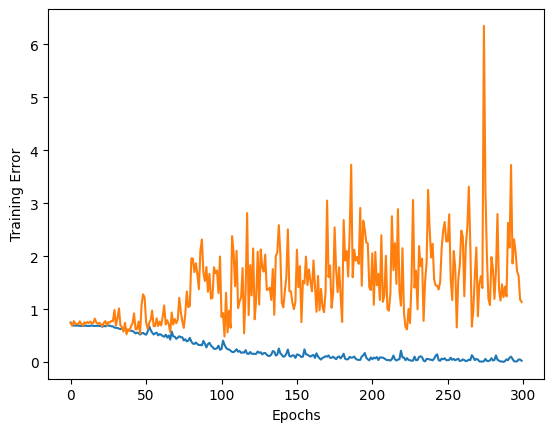

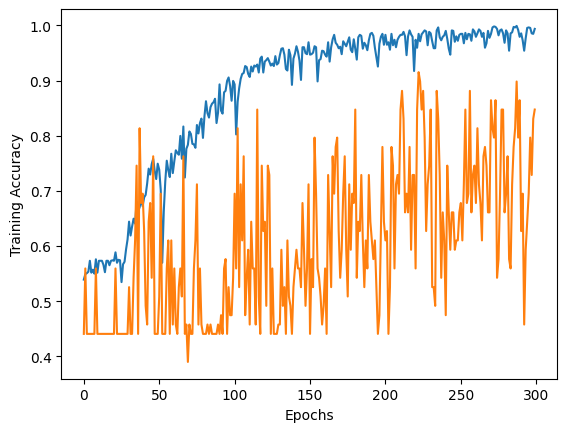

In [ ]:
one_hot_labels = keras.utils.to_categorical(y_train, num_classes=2)
hist_ResNet=model_resnet50.fit(np.repeat(x_train.reshape((x_train.shape[0],32,32,1)), 3, axis=3), one_hot_labels, epochs=300, validation_split=0.05, batch_size=32, callbacks=[])

plt.figure(1);
plt.plot(hist_ResNet.history["loss"]);
plt.plot(hist_ResNet.history["val_loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

plt.figure(2);
plt.plot(hist_ResNet.history["accuracy"]);
plt.plot(hist_ResNet.history["val_accuracy"]);
plt.xlabel('Epochs');
plt.ylabel('Training Accuracy');


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np

# Overall F1 score
y_pred=np.argmax(model_resnet50.predict(np.repeat(x_test.reshape((x_test.shape[0],32,32,1)), 3, axis=3)), axis=1)
print("F1 Score:  ", f1_score(y_test, y_pred, average="macro"))
print("Precision: ", precision_score(y_test, y_pred, average="macro"))
print("Recall:    ", recall_score(y_test, y_pred, average="macro"))
print("Accuracy:    ", accuracy_score(y_test, y_pred))
print("Accuracy:    ", np.mean(y_pred.reshape(1171,1)==y_test))



37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step
F1 Score:   0.9021818598479389
Precision:  0.8999539113689204
Recall:     0.9069399641577061
Accuracy:     0.9035012809564474
Accuracy:     0.9035012809564474


## Pretrained VGG19

In [ ]:
import keras
import matplotlib.pyplot as plt

#img_size_target = 32;
#img_input = tf.keras.layers.Input(shape=(img_size_target, img_size_target,1))
#img_conc = tf.keras.layers.Concatenate()([img_input, img_input, img_input])

from keras.applications.vgg19 import VGG19

## Loading VGG16 model
pre_model = VGG19(include_top=False, weights='imagenet', input_shape=(32,32,3))
pre_model.trainable = False ## Not trainable weights
pre_model.layers[15].trainable = True
pre_model.layers[16].trainable = True
pre_model.layers[17].trainable = True
pre_model.layers[18].trainable = True
pre_model.layers[19].trainable = True

from keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_0 = layers.Dense(256, activation='relu')
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')

model_v19 = models.Sequential([
    pre_model,
    flatten_layer,
    dense_layer_0,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

pre_model.summary()
model_v19.summary()

# from keras.callbacks import EarlyStopping

model_v19.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_25 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 1, 1, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,192,802 (77.03 MB)

 Trainable params: 7,247,842 (27.65 MB)

 Non-trainable params: 12,944,960 (49.38 MB)

Epoch 1/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.5302 - loss: 0.7383 - val_accuracy: 0.4407 - val_loss: 0.7247
Epoch 2/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5735 - loss: 0.6502 - val_accuracy: 0.5763 - val_loss: 0.6985
Epoch 3/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7308 - loss: 0.5406 - val_accuracy: 0.6610 - val_loss: 0.5959
Epoch 4/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7917 - loss: 0.4366 - val_accuracy: 0.7797 - val_loss: 0.5366
Epoch 5/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8836 - loss: 0.3044 - val_accuracy: 0.5254 - val_loss: 1.1698
Epoch 6/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8580 - loss: 0.3029 - val_accuracy: 0.6780 - val_loss: 0.8764
Epoch 7/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9261 - loss: 0.1907 - val_accuracy: 0.6610 - val_loss: 1.6097
Epoch 8/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9149 - loss: 0.2059 - val_accuracy: 0

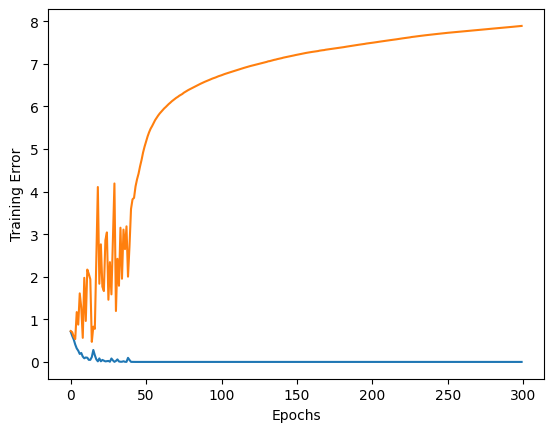

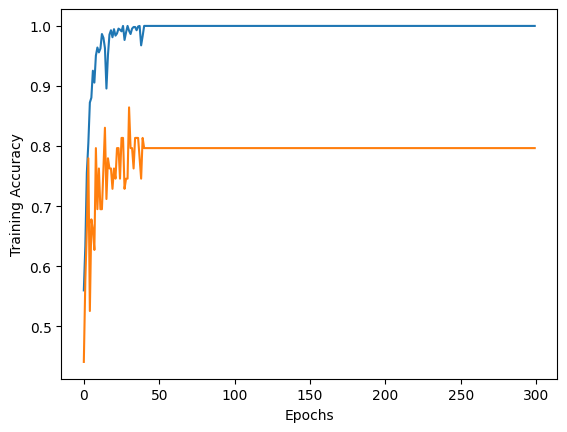

In [ ]:
one_hot_labels = keras.utils.to_categorical(y_train, num_classes=2)
hist_v19=model_v19.fit(np.repeat(x_train.reshape((x_train.shape[0],32,32,1)), 3, axis=3), one_hot_labels, epochs=300, validation_split=0.05, batch_size=32, callbacks=[])

plt.figure(1);
plt.plot(hist_v19.history["loss"]);
plt.plot(hist_v19.history["val_loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

plt.figure(2);
plt.plot(hist_v19.history["accuracy"]);
plt.plot(hist_v19.history["val_accuracy"]);
plt.xlabel('Epochs');
plt.ylabel('Training Accuracy');


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np

# Overall F1 score
y_pred=np.argmax(model_v19.predict(np.repeat(x_test.reshape((x_test.shape[0],32,32,1)), 3, axis=3)), axis=1)
print("F1 Score:  ", f1_score(y_test, y_pred, average="macro"))
print("Precision: ", precision_score(y_test, y_pred, average="macro"))
print("Recall:    ", recall_score(y_test, y_pred, average="macro"))
print("Accuracy:    ", accuracy_score(y_test, y_pred))
print("Accuracy:    ", np.mean(y_pred.reshape(1171,1)==y_test))


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step
F1 Score:   0.9558403827820483
Precision:  0.961722809395588
Recall:     0.9517353643966546
Accuracy:     0.9573014517506405
Accuracy:     0.9573014517506405


## Pretrained Inception

In [ ]:
import keras
import matplotlib.pyplot as plt

#img_size_target = 32;
#img_input = tf.keras.layers.Input(shape=(img_size_target, img_size_target,1))
#img_conc = tf.keras.layers.Concatenate()([img_input, img_input, img_input])

from keras.applications.xception import Xception

## Loading VGG16 model
pre_model = Xception(input_shape = (256, 256, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')
pre_model.trainable = False ## Not trainable weights

from keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')

model = models.Sequential([
    pre_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

pre_model.summary()
model.summary()

In [ ]:
# from keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

one_hot_labels = keras.utils.to_categorical(y_train, num_classes=2)

xx = np.repeat(x_train.reshape(x_train.shape[0],32,32,1), 3, axis=3).resize(512,512)
# np.repeat(x_train.reshape((x_train.shape[0],32,32,1)), 3, axis=3)
hist_Inception=model.fit(xx, one_hot_labels, epochs=300, validation_split=0.05, batch_size=32, callbacks=[])

plt.figure(1);
plt.plot(hist_Inception.history["loss"]);
plt.plot(hist_Inception.history["val_loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

plt.figure(2);
plt.plot(hist_Inception.history["accuracy"]);
plt.plot(hist_Inception.history["val_accuracy"]);
plt.xlabel('Epochs');
plt.ylabel('Training Accuracy');


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np

# Overall F1 score
y_pred=np.argmax(model.predict(np.repeat(x_test.reshape((x_test.shape[0],32,32,1)), 3, axis=3)), axis=1)
print("F1 Score:  ", f1_score(y_test, y_pred, average="macro"))
print("Precision: ", precision_score(y_test, y_pred, average="macro"))
print("Recall:    ", recall_score(y_test, y_pred, average="macro"))
print("Accuracy:    ", accuracy_score(y_test, y_pred))
print("Accuracy:    ", np.mean(y_pred.reshape(1171,1)==y_test))


## Summary

In [ ]:
plt.plot(hist1.history['loss']);
plt.plot(hist_v16.history['loss']);
plt.plot(hist_v19.history['loss']);
plt.plot(hist_ResNet.history['loss']);
plt.legend(['V16', 'V19', 'ResNet50'])

#plt.plot(hist_ResNet.history['accuracy']);
#plt.plot(hist_v19.history['val_loss']);
#plt.plot(hist_v19.history['val_accuracy']);
plt.xlabel('Epochs');
plt.ylabel('Training Criteria');